In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/serrabayraktar/Desktop/Newdataset210 - Sheet1 (1).csv')

df.head()



,People,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,Female,18-24,Instagram,Normally,Yes,Very often,Yes,3,I follow influencers and celebrities,Normally
1,2,Female,18-24,Instagram,Normally,Yes,Very often,Yes,4,I follow some influencers,Normally
2,3,Male,18-24,Instagram,Always,Yes,Sometimes,Yes,2,I follow influencers and celebrities,Occasionally
3,4,Female,18-24,Instagram,Always,Yes,Very often,No,3,I do not follow influencer or celebrities,Occasionally
4,5,Female,18-24,Pinterest,Normally,Yes,Sometimes,Yes,1,I follow influencers and celebrities,Normally


In [368]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 50 rows and 11 columns.


In [369]:
print(df.columns)

Index(['People', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   People  50 non-null     int64 
 1   Q1      50 non-null     object
 2   Q2      50 non-null     object
 3   Q3      50 non-null     object
 4   Q4      50 non-null     object
 5   Q5      50 non-null     object
 6   Q6      50 non-null     object
 7   Q7      50 non-null     object
 8   Q8      50 non-null     int64 
 9   Q9      50 non-null     object
 10  Q10     50 non-null     object
dtypes: int64(2), object(9)
memory usage: 4.4+ KB


In [371]:
# Information about the numerical columns
df.describe()

,People,Q8
count,50.00000,50.00000
mean,25.50000,3.50000
std,14.57738,1.19949
min,1.00000,1.00000
25%,13.25000,3.00000
50%,25.50000,4.00000
75%,37.75000,4.00000
max,50.00000,5.00000


In [372]:
import pandas as pd

scale_mapping = {
    'Never': 1,
    'Occasionally': 2,
    'Sometimes': 3,
    'Normally': 4,
    'Always': 5
}

binary_mapping = {
    'Yes': 1,
    'No': 0
}

# Q4 ve Q10 sütunları için kodlamayı uygulama
df['Q4'] = df['Q4'].map(scale_mapping)
df['Q10'] = df['Q10'].map(scale_mapping)

# Q5 ve Q7 sütunları için ikili kodlamayı uygulama
df['Q5'] = df['Q5'].map(binary_mapping)
df['Q7'] = df['Q7'].map(binary_mapping)

# Kodlamadan sonra ilk beş satırı göster
print(df.head())

   People      Q1     Q2         Q3  Q4  Q5          Q6  Q7  Q8  \
0       1  Female  18-24  Instagram   4   1  Very often   1   3   
1       2  Female  18-24  Instagram   4   1  Very often   1   4   
2       3    Male  18-24  Instagram   5   1   Sometimes   1   2   
3       4  Female  18-24  Instagram   5   1  Very often   0   3   
4       5  Female  18-24  Pinterest   4   1   Sometimes   1   1   

                                          Q9  Q10  
0       I follow influencers and celebrities    4  
1                  I follow some influencers    4  
2       I follow influencers and celebrities    2  
3  I do not follow influencer or celebrities    2  
4       I follow influencers and celebrities    4  


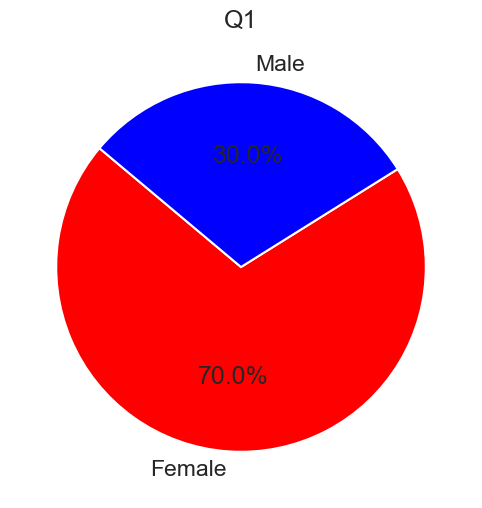

In [373]:
import matplotlib.pyplot as plt
import pandas as pd

# Veri setinizi yükleyin
# data = pd.read_csv('yol/dosya_adi.csv')

# Q1 sütunundaki cinsiyet dağılımını sayma
gender_counts = df['Q1'].value_counts()

# Pasta grafiği çiz
plt.figure(figsize=(10,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('Q1')
plt.show()

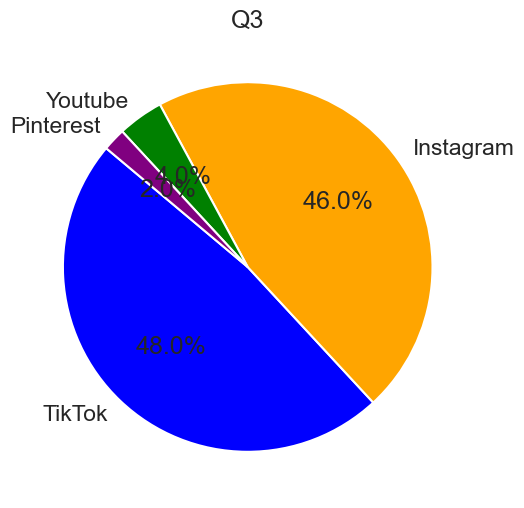

In [374]:
import matplotlib.pyplot as plt
import pandas as pd

# Veri setinizi yükleyin
# data = pd.read_csv('yol/dosya_adi.csv')

# Q3 sütunundaki sosyal medya platformlarına göre dağılımı sayma
platform_counts = df['Q3'].value_counts()

# Pasta grafiği çiz
plt.figure(figsize=(10,6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'purple', 'yellow'])
plt.title('Q3')
plt.show()


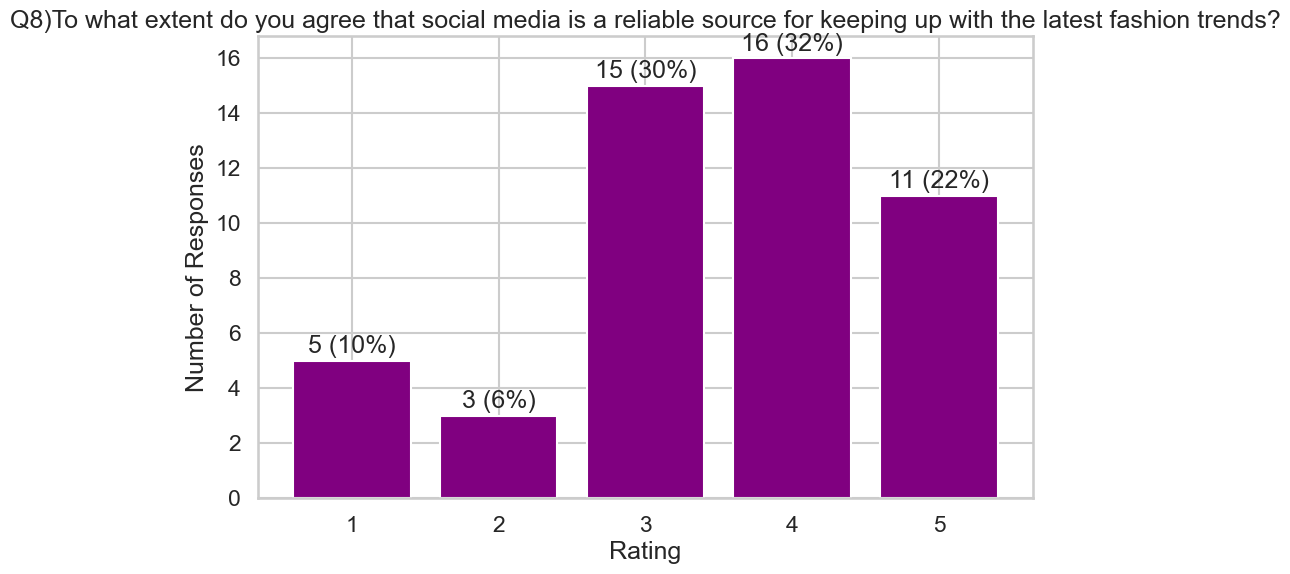

In [375]:
import matplotlib.pyplot as plt
import pandas as pd

# Veri setinizi yükleyin
# data = pd.read_csv('yol/dosya_adi.csv')

# Q8 sütunundaki yanıtları sayma
response_counts = df['Q8'].value_counts().sort_index()

# Çubuk grafiği çiz
plt.figure(figsize=(10,6))
bars = plt.bar(response_counts.index, response_counts.values, color='purple')

# Her çubuk üzerinde yüzde değerleri göster
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval} ({yval/sum(response_counts.values)*100:.0f}%)', ha='center', va='bottom')

plt.title('Q8)To what extent do you agree that social media is a reliable source for keeping up with the latest fashion trends?')
plt.xlabel('Rating')
plt.ylabel('Number of Responses')
plt.xticks(response_counts.index)
plt.show()


In [376]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Veri setinizi yükleyin
# df = pd.read_csv('yol/dosya_adi.csv')

# 'Q3' sütunundaki kategorik verileri sayısal değerlere dönüştürme
encoder = LabelEncoder()
df['Q3_encoded'] = encoder.fit_transform(df['Q3'])

# 'Q5' veya 'Q7' sütunlarını bağımlı değişken olarak kullanma
# Burada 'Yes' yanıtını 1, 'No' yanıtını 0 olarak kodluyoruz
df['Q7_numeric'] = df['Q7'].apply(lambda x: 1 if x == 'Yes' else 0)

# Bağımsız değişken (X) olarak Q3 ve bağımlı değişken (y) olarak Q5 kullanma
X = df[['Q3_encoded']]
y = df['Q7_numeric']

# Veri setini eğitim ve test setine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar Ağacı modelini kurma ve eğitme
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma ve performans metriklerini yazdırma
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion matrix:
 [[10]]


In [377]:
# Modeli kurduktan ve eğittikten sonra, bazı tahminler yapalım
# Örneğin, Q5 için 'Yes' (1 olarak kodlanmış) yanıtını veren kullanıcılar için Q7 tahminleri yapalım

# Tahmin yapmak istediğimiz girdileri bir numpy array olarak oluşturalım
# Burada tüm girdiler 'Yes' olduğu için hepsine 1 değerini veriyoruz
sample_input = np.array([1])  # Örnek olarak sadece bir girdi

# Modeli kullanarak tahmin yapma
predicted_output = model.predict(sample_input.reshape(-1, 1))

# Tahmin edilen çıktıyı yazdırma
print(f"The predicted probability of purchasing a fashion item after seeing it on social media for 'Yes' response in Q5 is: {predicted_output[0]}")




The predicted probability of purchasing a fashion item after seeing it on social media for 'Yes' response in Q5 is: 2.9669117647058822


In [378]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_q4 = LabelEncoder()
le_q9 = LabelEncoder()

# Encode Q4 and Q9 responses
df['Q4_encoded'] = le_q4.fit_transform(df['Q4'])
df['Q9_encoded'] = le_q9.fit_transform(df['Q9'])

# Display unique values for original and encoded responses
unique_q4 = df['Q4'].unique()
unique_q4_encoded = df['Q4_encoded'].unique()
unique_q9 = df['Q9'].unique()
unique_q9_encoded = df['Q9_encoded'].unique()

(unique_q4, unique_q4_encoded), (unique_q9, unique_q9_encoded)

((array([4, 5, 3, 1]), array([2, 3, 1, 0])),
 (array(['I follow influencers and celebrities',
         'I follow some influencers',
         'I do not follow influencer or celebrities',
         'I follow some celebrities'], dtype=object),
  array([1, 3, 0, 2])))

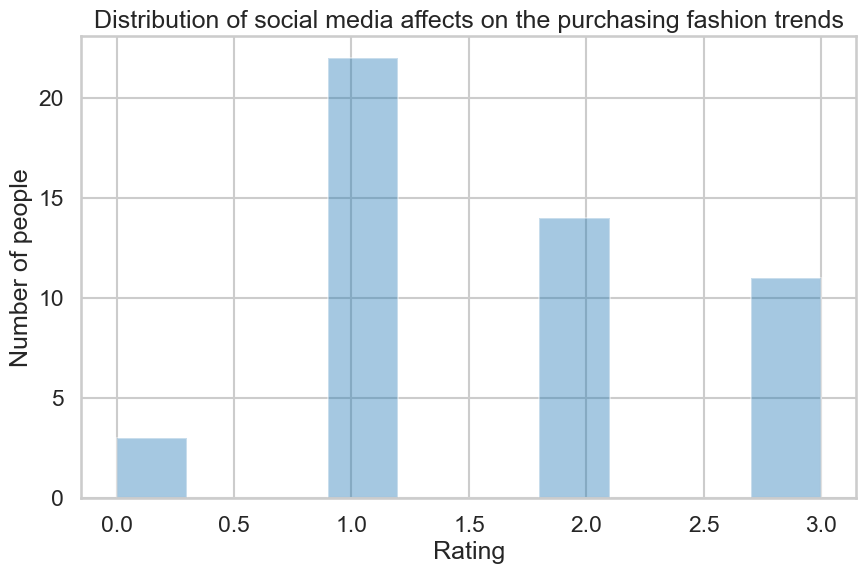

In [380]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,6))
sns.distplot(df['Q4_encoded'], kde=False, bins=10)
plt.title('Distribution of social media affects on the purchasing fashion trends')
plt.xlabel('Rating')
plt.ylabel('Number of people')
plt.show()

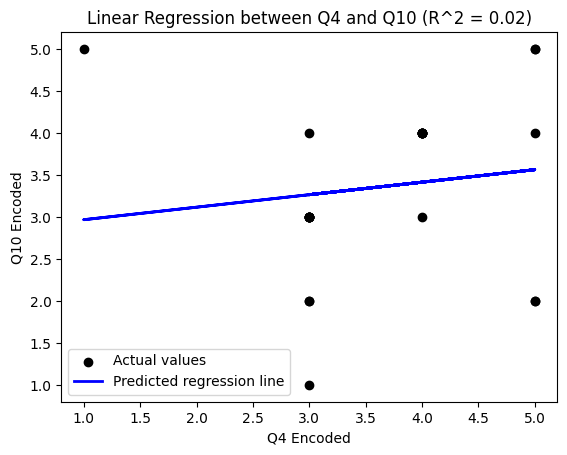

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Q4 ve Q10 için verilen örnek veriler
q10_values = [4, 4, 2, 2, 4, 3, 3, 4, 4, 5, 3, 4, 3, 5, 3, 4, 4, 3, 3, 3, 2, 4, 5, 2, 1]
q4_values = [4, 4, 5, 5, 4, 3, 3, 4, 3, 5, 3, 4, 3, 1, 3, 5, 4, 3, 4, 3, 3, 4, 5, 3, 3]

# Verileri DataFrame olarak oluştur
df = pd.DataFrame({'Q4_encoded': q4_values, 'Q10_encoded': q10_values})

# Lineer regresyon modeli oluşturma
model = LinearRegression()
model.fit(df[['Q4_encoded']], df['Q10_encoded'])

# Tahminlerin hesaplanması
df['Q10_predicted'] = model.predict(df[['Q4_encoded']])

# Modelin R^2 değerini hesaplama
r2 = model.score(df[['Q4_encoded']], df['Q10_encoded'])

# Gerçek ve tahmin edilen değerler ile birlikte bir scatter plot çizme
plt.scatter(df['Q4_encoded'], df['Q10_encoded'], color='black', label='Actual values')
plt.plot(df['Q4_encoded'], df['Q10_predicted'], color='blue', linewidth=2, label='Predicted regression line')

# Etiketleri ve efsaneyi ekleme
plt.xlabel('Q4 Encoded')
plt.ylabel('Q10 Encoded')
plt.title(f'Linear Regression between Q4 and Q10 (R^2 = {r2:.2f})')
plt.legend()

# Grafik gösterme
plt.show()
